# **WELCOME TO WATER QUALITY PREDICTION!**
Here, we are using a Dataset which has the features:-

1. **pH value**: PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. **Hardness**: Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. **Solids (Total dissolved solids - TDS)**: Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. **Chloramines**: Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. **Sulfate**: Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. **Conductivity**: Pure water is not a good conductor of electric current rather is a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. **Organic_carbon**: Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. **Trihalomethanes**: THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. **Turbidity**: The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. **Potability**: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [6]:
import pandas as pd

df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## **Finding the number of NaN values**
Here, we are using the .sum() function to find the sum of NaN values that .isna() is calculating from each row per column.

In [7]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df = df.interpolate()
df.isna().sum()
len(df.index)

3276

In [9]:
df.dropna(inplace=True)
df.isna().sum()
# len(df.index)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## **Calculating the Water Quality Index**
From the given dataset, we use the features to calculate the Water Quality Index (WQI) and then add the WQI into the dataset. Here, we aren't modifying the existing dataset, rather creating a new one by the name `new_df`.


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [11]:
new_df = df.copy()

### **Scaling down the values**

Using `MinMaxScaler()` to scale down the values to a suitable range so that it's easier for model to train itself on those values.

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Features to normalize (excluding Potability)
features_to_normalize = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                         'Organic_carbon', 'Trihalomethanes', 'Turbidity']

scaler = MinMaxScaler(feature_range=(0, 100))
new_df[features_to_normalize] = scaler.fit_transform(new_df[features_to_normalize])
new_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1,26.543429,29.740043,30.061142,49.183921,66.937262,71.941108,49.731851,45.099930,57.679264,0
2,57.850887,64.131081,32.161885,69.854275,65.836003,41.465206,56.201674,53.286570,30.363656,0
3,59.405471,60.553587,35.624379,60.331369,64.734744,31.788047,62.208906,80.806473,60.101542,0
4,64.944453,48.485088,28.992169,48.490019,51.454537,37.933671,35.855477,25.360608,49.632736,0
5,39.886333,51.100984,46.674592,56.304257,56.153738,17.309194,23.753773,43.955040,20.981437,0
...,...,...,...,...,...,...,...,...,...,...
3271,33.343583,53.048233,77.594740,53.343553,65.604679,60.319152,44.806201,53.503671,56.453411,1
3272,55.777543,53.001615,27.926294,60.347256,65.604679,36.891240,67.828449,54.784563,25.491451,1
3273,67.282217,46.548556,53.910122,54.780691,65.604679,43.815187,33.866167,56.065454,34.956996,1
3274,36.619735,66.440723,19.148981,46.585961,65.604679,38.715734,34.363779,62.265916,61.611996,1


### **Assign weights and calculate the WQI**

Assigning weights to the features as per the formula:-


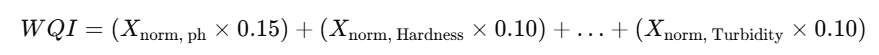

In [13]:
# Step 3: Assign weights and calculate the WQI
weights = {
    'ph': 0.15,
    'Hardness': 0.1,
    'Solids': 0.1,
    'Chloramines': 0.1,
    'Sulfate': 0.1,
    'Conductivity': 0.1,
    'Organic_carbon': 0.1,
    'Trihalomethanes': 0.1,
    'Turbidity': 0.1
}

new_df['WQI'] = sum(new_df[feature] * weight for feature, weight in weights.items())

In [14]:
new_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,WQI
1,26.543429,29.740043,30.061142,49.183921,66.937262,71.941108,49.731851,45.099930,57.679264,0,44.018967
2,57.850887,64.131081,32.161885,69.854275,65.836003,41.465206,56.201674,53.286570,30.363656,0,50.007668
3,59.405471,60.553587,35.624379,60.331369,64.734744,31.788047,62.208906,80.806473,60.101542,0,54.525725
4,64.944453,48.485088,28.992169,48.490019,51.454537,37.933671,35.855477,25.360608,49.632736,0,42.362099
5,39.886333,51.100984,46.674592,56.304257,56.153738,17.309194,23.753773,43.955040,20.981437,0,37.606251


## **SPLITTING THE DATASET INTO TRAINING AND TEST DATA, THEN TRAINING THE MODEL**

First we split the dataset into training and test datasets. We are splitting it in the ratio 80:20.

Then, we create a SVR (Support Vector Regression) model based on the training dataset.

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

inputs = new_df.drop(['WQI'], axis=1)
outputs = new_df['WQI']

X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Step 7: Create and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

### **Making predictions based on the Test Dataset**

We are using the model to make predictions based on the Test Dataset.

After making predictions, we are calculating the accuracy and the amount of error. As per calculations, this model is giving us an accuracy of 98%.

In [16]:
# Step 8: Make predictions on the test set
y_pred = svr.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.22349226373008915
R^2 Score: 0.986150161999907


## **VISUALIZING PREDICTED AND ACTUAL WQI**

We can see that the model is fairly accurate as the blue dots representing the predicted values are lying very close to the red line. This means our model was a success!

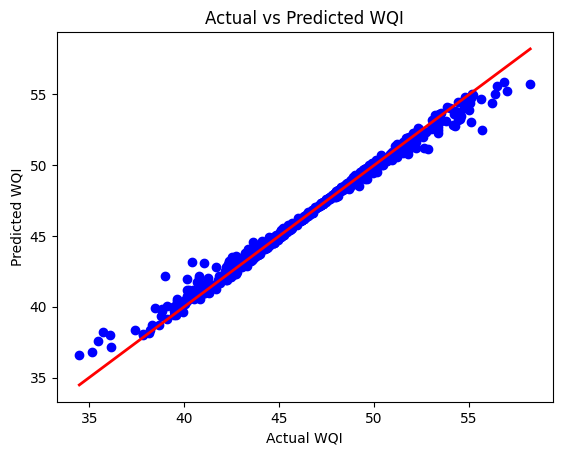

In [17]:
# Step 10: Plot Actual vs Predicted WQI values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Diagonal line
plt.title('Actual vs Predicted WQI')
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.show()